In [ ]:
# PROJECT 2 :- WEATHER DATA ANALYSIS USING NUMPY, PANDAS AND METAPLOTLIB.
# PRESENTED BY ARPIT SONI AND ARPIT BHATI

In [7]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Arpit Soni\Downloads\weather dataset\weather_classification_data.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.

In [8]:
# Check for null values in the dataset
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [9]:
#Checking for the dupliacte values
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [10]:
# Summary statistics of numeric columns
print(df.describe())


        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

In [14]:
# setting outliers values to highest and lowest recorded value on the earth
# Clip Temperature, Precipitation, and Atmospheric Pressure columns
df["Temperature"] = df["Temperature"].clip(upper=56.7)  # Cap temperature at the highest recorded (56.7°C)
df["Precipitation (%)"] = df["Precipitation (%)"].clip(upper=96)  # Cap precipitation at the highest recorded (96%)
df["Atmospheric Pressure"] = df["Atmospheric Pressure"].clip(upper=1084, lower=870)  # Cap atmospheric pressure between the lowest (870 hPa) and highest (1084 hPa)

print(df.describe())



        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      18.862030     68.710833      9.832197          53.298182   
std       16.618212     20.194248      6.908704          31.437387   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max       56.700000    109.000000     48.500000          96.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1004.739024      4.005758         5.462917  
std               28.689458      3.856600         3.371499  
min              870.000000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

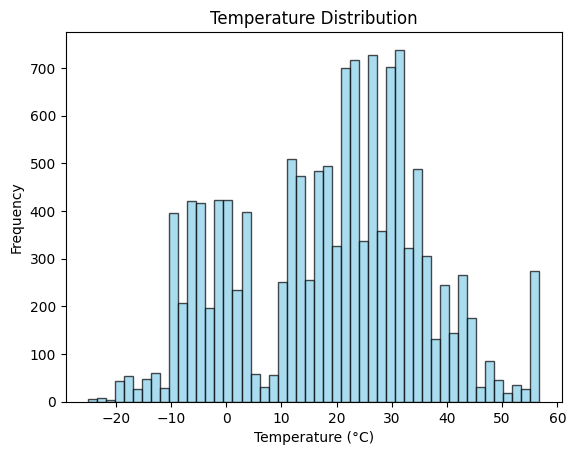

In [15]:
import matplotlib.pyplot as plt

# Temperature Histogram
df['Temperature'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()




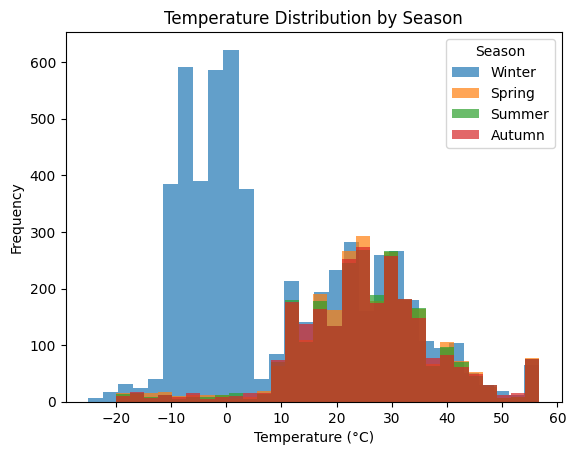

In [16]:
# Group data by 'Season' and plot separate histograms for each season
seasons = df['Season'].unique()  

for season in seasons:
    df_season = df[df['Season'] == season]
    plt.hist(df_season['Temperature'], bins=30, alpha=0.7, label=season)

plt.title('Temperature Distribution by Season')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(title='Season')
plt.show()




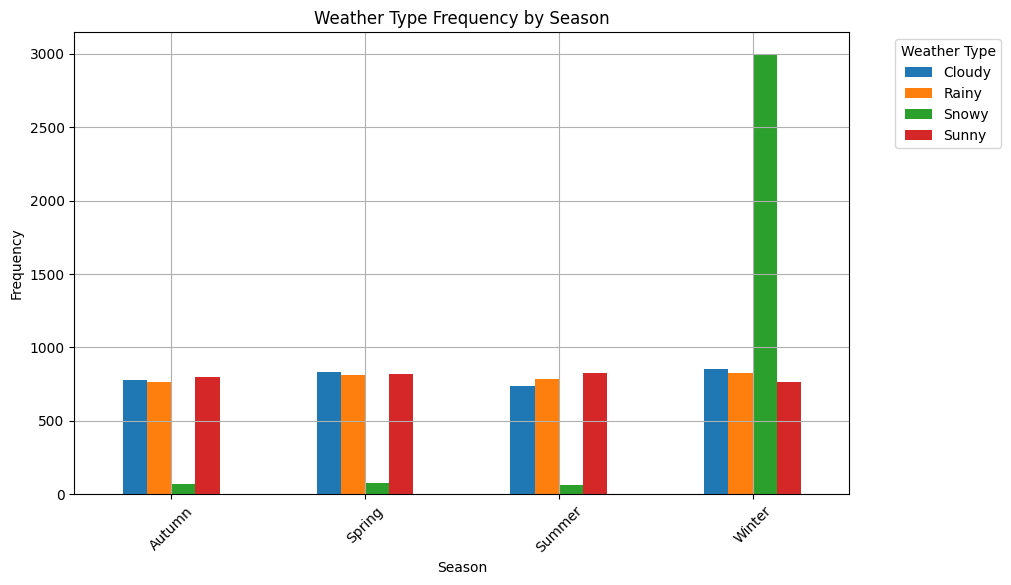

In [36]:
import matplotlib.pyplot as plt

# Group by 'Season' and 'Weather Type' and count occurrences
season_weather_count = df.groupby(['Season', 'Weather Type']).size().unstack()

# Plot the bar chart
season_weather_count.plot(kind='bar', stacked=False, figsize=(10, 6))

# Customize the plot
plt.title('Weather Type Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend to the right
plt.grid(True)

# Show the plot
plt.show()


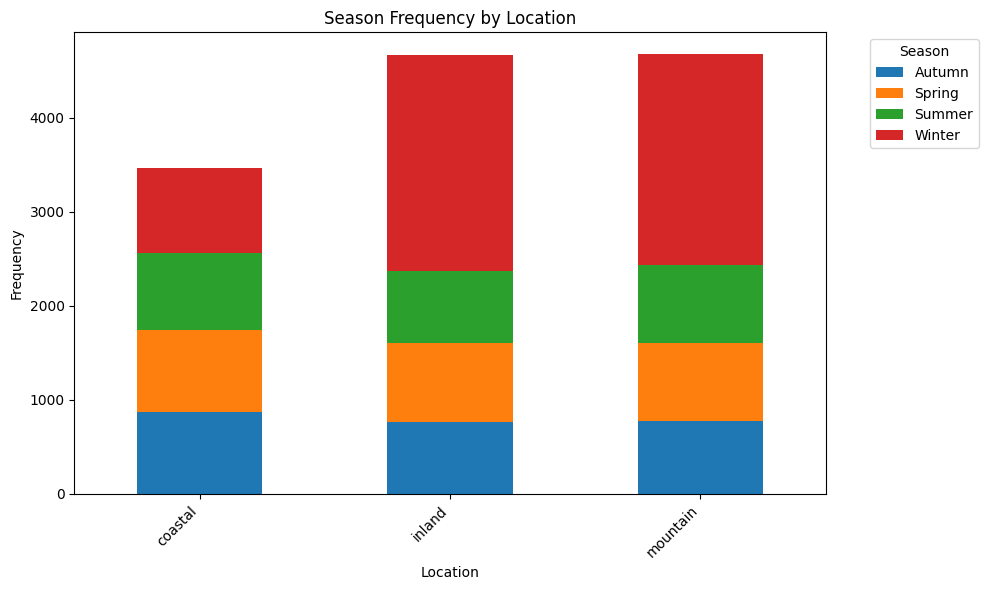

In [38]:
import matplotlib.pyplot as plt

# Count the occurrences of each season by location
season_location_counts = df.groupby(['Location', 'Season']).size().unstack()

# Plotting the bar plot
season_location_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Season Frequency by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


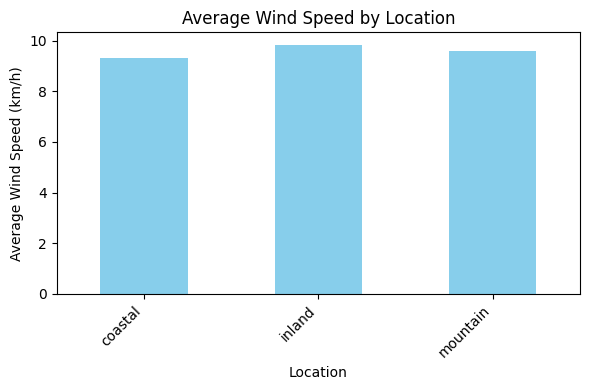

In [52]:
import matplotlib.pyplot as plt

# Calculate the average wind speed by location
average_wind_speed = df.groupby('Location')['Wind Speed'].mean()

# Plotting the smaller bar chart of average wind speed by location
plt.figure(figsize=(6, 4))  # Adjusted size to make the graph smaller
average_wind_speed.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Wind Speed by Location')
plt.xlabel('Location')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


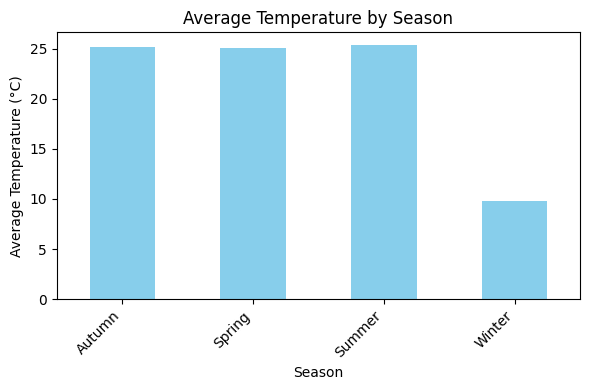

In [48]:
import matplotlib.pyplot as plt

# Calculate the average temperature for each season
average_temperature = df.groupby('Season')['Temperature'].mean()

# Plotting the smaller bar chart
plt.figure(figsize=(6, 4))  # Adjust the size to make the graph smaller
average_temperature.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


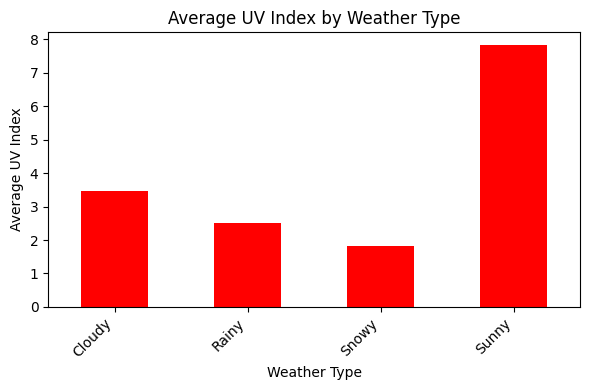

In [55]:
# Calculate the average UV Index by Weather Type
average_uv_index = df.groupby('Weather Type')['UV Index'].mean()

# Plotting the bar chart for average UV Index by Weather Type
plt.figure(figsize=(6, 4))  # Smaller figure size
average_uv_index.plot(kind='bar', color='red')

# Customize the plot
plt.title('Average UV Index by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average UV Index')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


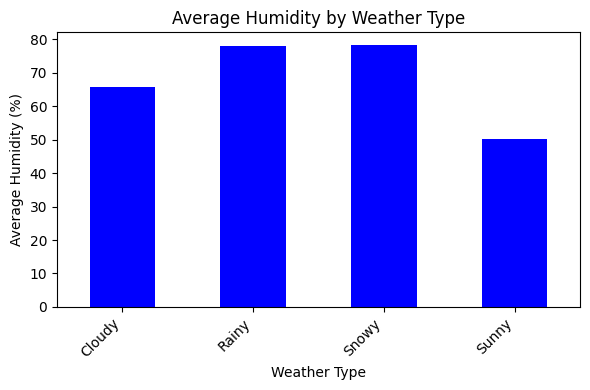

In [59]:
# Calculate the average Humidity by Weather Type
average_humidity = df.groupby('Weather Type')['Humidity'].mean()

# Plotting the bar chart for average Humidity by Weather Type
plt.figure(figsize=(6, 4))  # Smaller figure size
average_humidity.plot(kind='bar', color='blue')

# Customize the plot
plt.title('Average Humidity by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Humidity (%)')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
